In [47]:
import numpy as np 
import pandas as pd 
import scipy.stats as st
import matplotlib.pyplot as plt 
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

cars = pd.read_csv('carsharing.csv', sep = ';', decimal=",", parse_dates=True)


In [3]:
#3.1 Quanti casi contiene il file ?
len(cars)

392

In [4]:
#3.2.2 In quante fasce orarie è stata suddivisa una giornata ?
len(cars.TimeFrame.unique())

5

In [8]:
cars.TimeFrame.value_counts()

FRAME B    123
FRAME C    107
FRAME D     94
FRAME A     47
FRAME E     21
Name: TimeFrame, dtype: int64

In [9]:
#3.2.4 Tabella frequenze congiunte di TimeFrame e RushHour
fasce_rh = pd.crosstab(index = cars.TimeFrame, columns = cars.RushHour, colnames = [''])
fasce_rh

,0,1
TimeFrame,,
FRAME A,47,0
FRAME B,0,123
FRAME C,107,0
FRAME D,0,94
FRAME E,21,0


In [10]:
#3.2.5 Leggendo la tabella di prima, quali sono le fasce orarie corrispondenti ad orari di punta
print('Sono le fasce B e D.')

Sono le fasce B e D.


In [15]:
#3.3 Consideriamo ora solo i clienti che hanno aderito al programma premium
cars_pr = cars[cars['PremiumCustomer'] == 1]
#cars_pr

In [16]:
#3.3.1 Quanti sono ?
len(cars_pr)

227

In [17]:
#3.3.2 Stima distanza media dei clienti premium
cars_pr.Distance.mean()

8.437444933920705

In [18]:
#3.3.3 Stima probabilità che un nuovo cliente si iscriva a premium
len(cars_pr)/len(cars)

0.5790816326530612

In [19]:
#3.3.4 Stimatore usato prima ?
print('Media campionaria')

Media campionaria


In [29]:
#3.3.5 Approssimazione probabilità di sbagliare la stima di p di al più 0.05
#CONTROLLARE PERCHè LUI FA DEV STD MA LA FORMULA è CON LA VARIANZA
sigma = cars.PremiumCustomer.var()
1-(sigma/(len(cars.PremiumCustomer)*(0.05**2)))

0.002573522754265589

In [30]:
#3.4 Studiamo ora la distanza in ogni uso del dataset completo


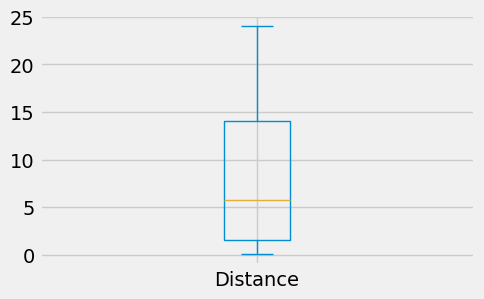

In [31]:
#3.4.1 Boxplot della distanza
cars.Distance.plot.box()
plt.show()

In [35]:
#3.4.2 Quali sono gli indici di centralità e dispersione che meglio caratterizzano la distanza
print('Mediana:', cars.Distance.median())
print('Range interquentile:', cars.Distance.quantile(.75)-cars.Distance.quantile(0.25))

Mediana: 5.75
Range interquentile: 12.45


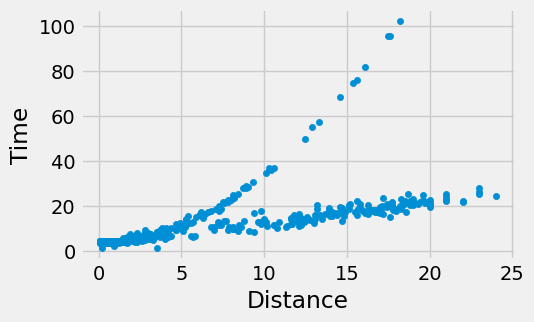

Non vi è alcuna relazione tra distanza e tempo impiegato, come si evince dal grafico.


In [37]:
#3.4.3 C'è relazione tra distanza percorsa e tempo impiegato ?
cars.plot.scatter('Distance', 'Time')
plt.show()
print('Non vi è alcuna relazione tra distanza e tempo impiegato, come si evince dal grafico.')

In [40]:
#3.4.4 Indice di correlazione tra distanza e tempo
print(cars.Distance.corr(cars.Time))
print('Tale indice conferma che non vi è relazione tra distanza e tempo.')

0.6273992247694647
Tale indice conferma che non vi è relazione tra distanza e tempo.


In [41]:
#3.5 Analizziamo la distanza percorsa in ogni uso del servizio in orario di punta

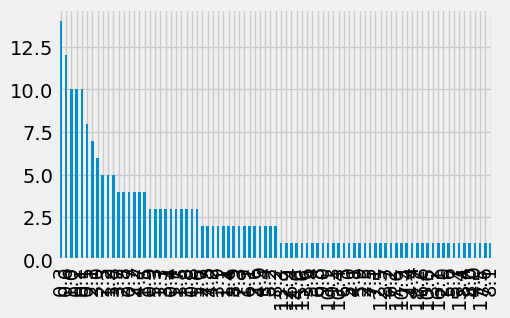

In [50]:
#3.5.1 Grafico rappresentativo della distribuzione della distanza percorsa in orari di punta
cars[cars['RushHour']==1].Distance.value_counts().plot.bar()
plt.show()

In [51]:
#3.5.2 Negli orari di punta la distanza segue una legge normale ?
print('No, infatti il grafico mostra come la distanza ha un andamento di tipo esponenziale')

No, infatti il grafico mostra come la distanza ha un andamento di tipo esponenziale


In [53]:
#3.5.3 Stimare valore atteso e deviazione standard della distanza negli orari di punta
print('Valore atteso:', cars[cars['RushHour'] == 1].Distance.mean())
print('Dev. standard:', cars[cars['RushHour'] == 1].Distance.std())

Valore atteso: 3.3193548387096796
Dev. standard: 3.711106147915895


In [54]:
#3.5.4 Modello probabilistico per la distanza percorsa in orari di punta ?
print('Modello esponenziale')

Modello esponenziale


In [55]:
#3.5.5 Le stime di v.a. e dev. std calcolate prima sono compatibili col modello proposto ?
print('Sì perchè sono molto simili.')

Sì perchè sono molto simili.
